In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from tqdm import tqdm_notebook as tqdm
import seaborn as sb
from statsmodels.graphics.gofplots import qqplot

import sys
sys.path.append("../")
import os
import pickle

### Import our modules
from Helpers import utils
import Helpers.statistical_tests as test
from GAN_synthetic import GAN as gan
from Helpers.Batch_Generator import generate_BS

%load_ext autoreload
%autoreload 2 # Reload modules before executing a cell
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Black Scholes simulator

mu: 0.032800


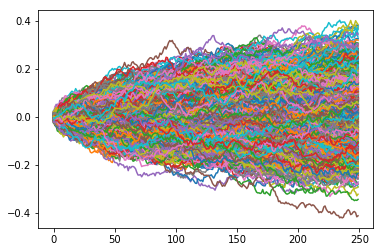

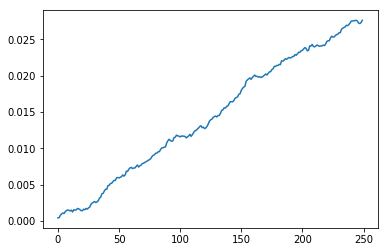

0.11983726


In [25]:
r, sigma, T, size = 0.04, 0.12, 250, 2000
sample = generate_BS(r, sigma, T, size).detach().numpy().T
print('mu: %f' % (r-sigma**2/2))
plt.plot(sample.cumsum(axis=0))
plt.show()
plt.plot(sample.cumsum(axis=0).mean(axis=1))
plt.show()
print(sample.cumsum(axis=0)[-1].std())

BS seems correctly implemented (good-looking samples, linear trend on average, right annual volatility).

In [28]:
path = r'C:\Users\dobau\Desktop\Generating_Financial_Time_Series_with_GAN'

step 0: discriminator: 1.393e+00, generator: -7.863e-01


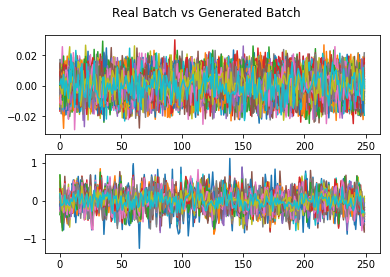

step 10: discriminator: 1.387e+00, generator: -7.777e-01


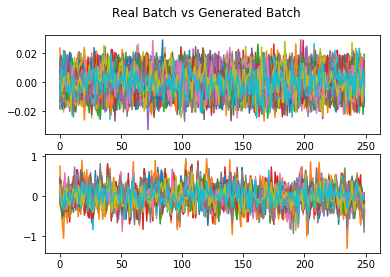

step 20: discriminator: 1.382e+00, generator: -7.684e-01


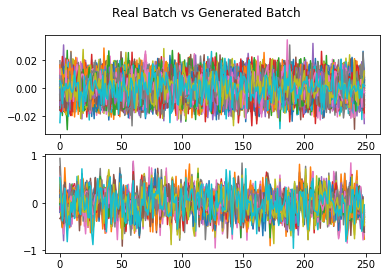

step 30: discriminator: 1.376e+00, generator: -7.591e-01


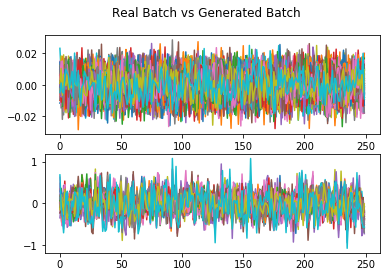

step 40: discriminator: 1.371e+00, generator: -7.507e-01


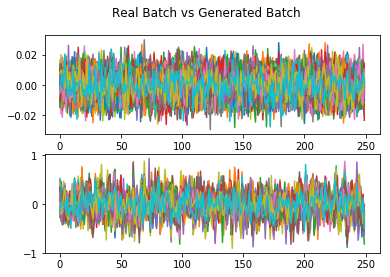

step 50: discriminator: 1.367e+00, generator: -7.426e-01


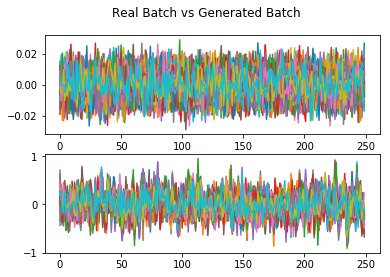

step 60: discriminator: 1.364e+00, generator: -7.349e-01


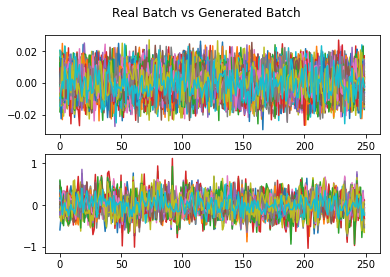

step 70: discriminator: 1.360e+00, generator: -7.288e-01


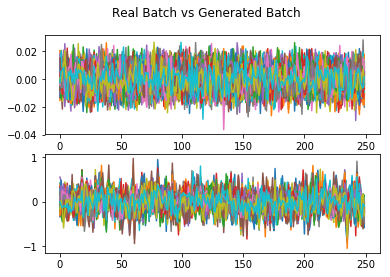

step 80: discriminator: 1.360e+00, generator: -7.256e-01


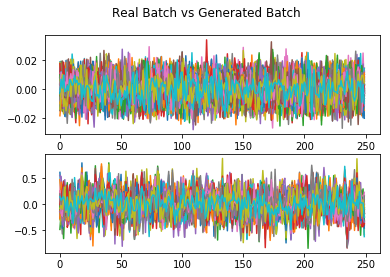

step 90: discriminator: 1.360e+00, generator: -7.235e-01


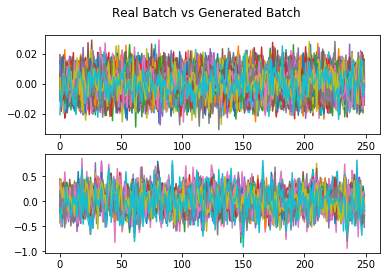

step 100: discriminator: 1.362e+00, generator: -7.228e-01


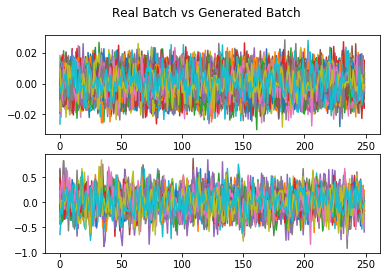

step 110: discriminator: 1.363e+00, generator: -7.212e-01


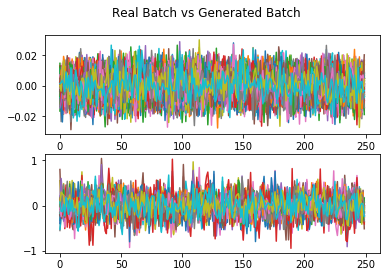

step 120: discriminator: 1.365e+00, generator: -7.204e-01


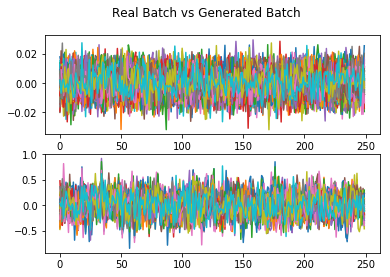

step 130: discriminator: 1.368e+00, generator: -7.202e-01


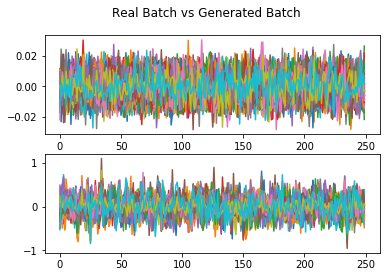

step 140: discriminator: 1.370e+00, generator: -7.209e-01


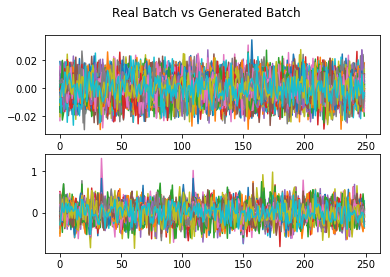

step 150: discriminator: 1.376e+00, generator: -7.237e-01


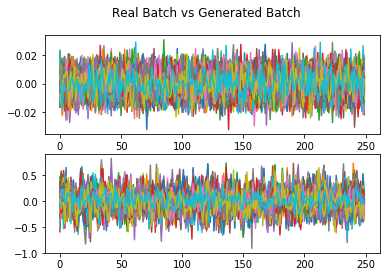

step 160: discriminator: 1.382e+00, generator: -7.286e-01


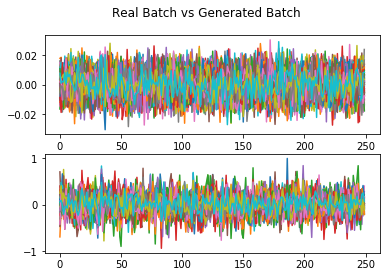

step 170: discriminator: 1.391e+00, generator: -7.330e-01


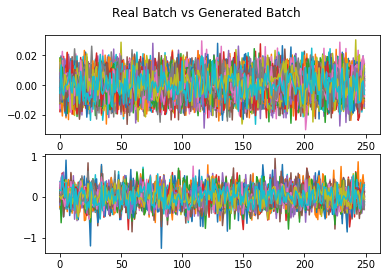

step 180: discriminator: 1.395e+00, generator: -7.339e-01


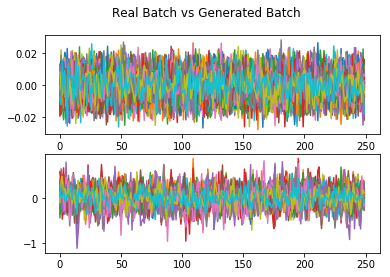

step 190: discriminator: 1.397e+00, generator: -7.323e-01


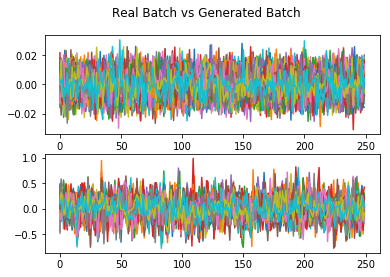

step 200: discriminator: 1.398e+00, generator: -7.294e-01


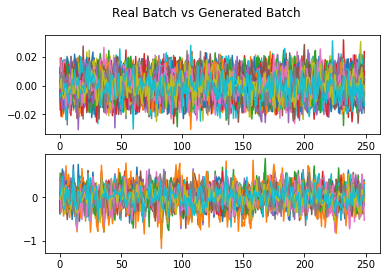

step 210: discriminator: 1.396e+00, generator: -7.251e-01


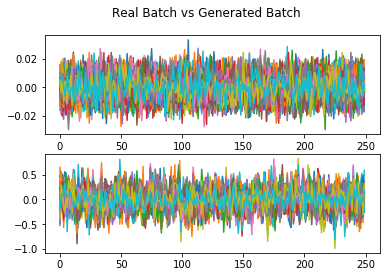

step 220: discriminator: 1.394e+00, generator: -7.203e-01


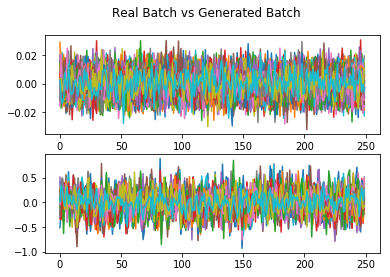

step 230: discriminator: 1.392e+00, generator: -7.150e-01


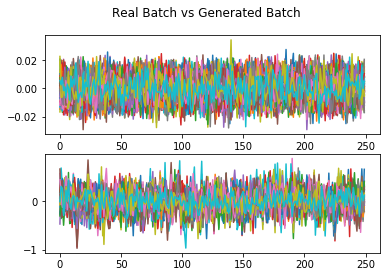

step 240: discriminator: 1.390e+00, generator: -7.086e-01


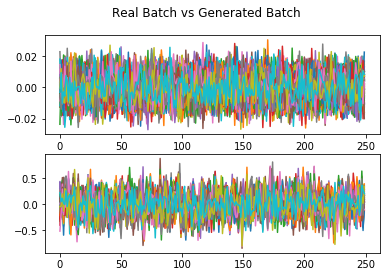

step 250: discriminator: 1.388e+00, generator: -7.050e-01


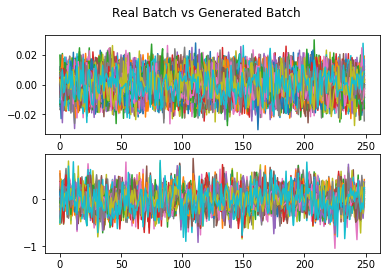

step 260: discriminator: 1.385e+00, generator: -7.003e-01


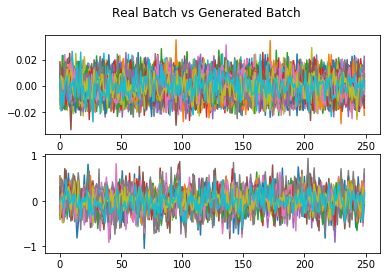

step 270: discriminator: 1.383e+00, generator: -6.958e-01


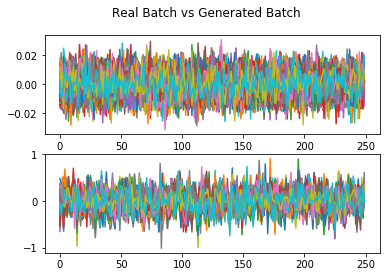

step 280: discriminator: 1.381e+00, generator: -6.918e-01


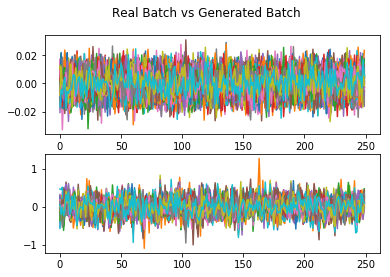

step 290: discriminator: 1.378e+00, generator: -6.890e-01


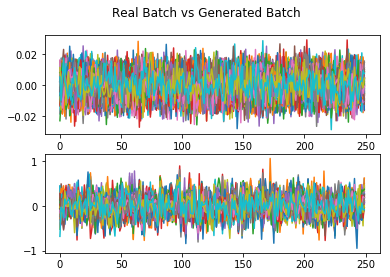

step 300: discriminator: 1.376e+00, generator: -6.875e-01


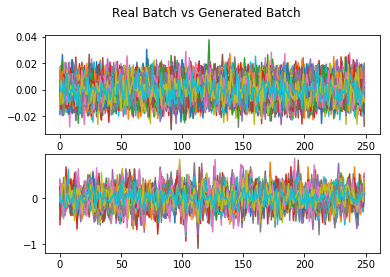

step 310: discriminator: 1.377e+00, generator: -6.881e-01


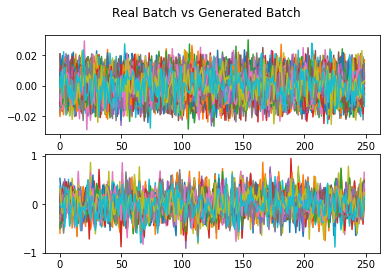

step 320: discriminator: 1.377e+00, generator: -6.885e-01


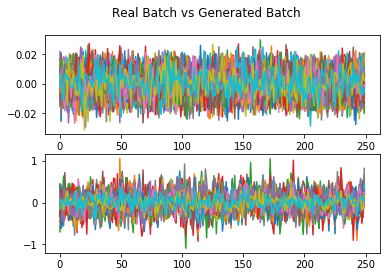

step 330: discriminator: 1.375e+00, generator: -6.866e-01


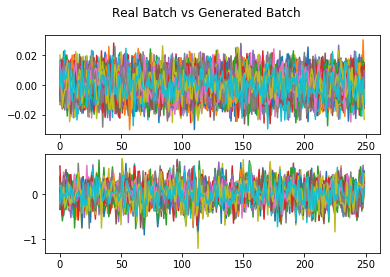

step 340: discriminator: 1.373e+00, generator: -6.857e-01


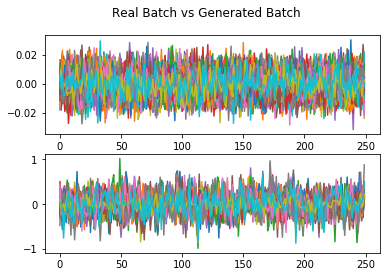

step 350: discriminator: 1.370e+00, generator: -6.841e-01


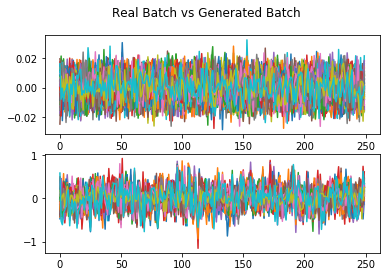

step 360: discriminator: 1.368e+00, generator: -6.832e-01


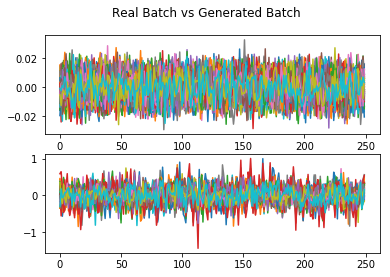

step 370: discriminator: 1.364e+00, generator: -6.815e-01


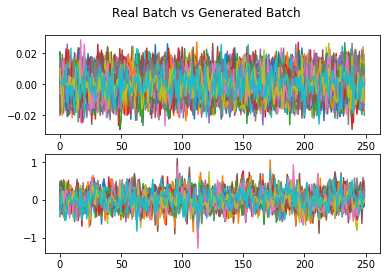

step 380: discriminator: 1.362e+00, generator: -6.800e-01


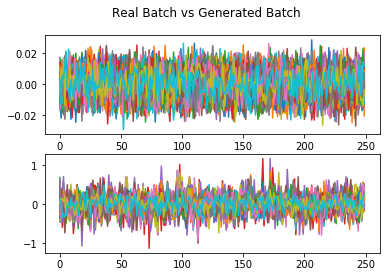

step 390: discriminator: 1.359e+00, generator: -6.780e-01


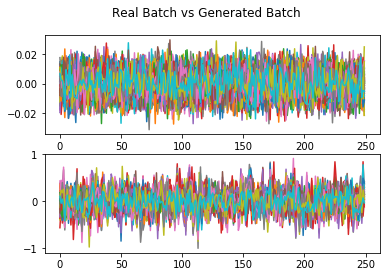

step 400: discriminator: 1.358e+00, generator: -6.787e-01


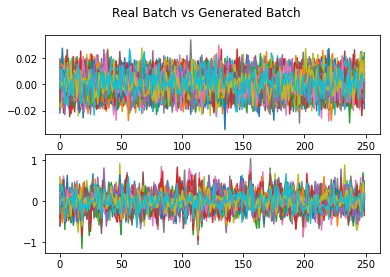

(Generator(
   (fc1): Linear(in_features=250, out_features=100, bias=True)
   (hidden_layers): ModuleList(
     (0): Linear(in_features=100, out_features=100, bias=True)
     (1): Linear(in_features=100, out_features=100, bias=True)
   )
   (fc2): Linear(in_features=100, out_features=250, bias=True)
   (bn): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (bn_out): BatchNorm1d(250, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 ), Discriminator(
   (fc1): Linear(in_features=250, out_features=10, bias=True)
   (hidden_layers): ModuleList(
     (0): Linear(in_features=10, out_features=10, bias=True)
   )
   (fc2): Linear(in_features=10, out_features=1, bias=True)
 ))

In [95]:
from Architectures.Lin_GAN import *
from Architectures.Lin_GAN import Generator as LG
from Architectures.Lin_GAN import Discriminator as LD

param = {
    'generate_batch': generate_BS,
    'param_gen_batch': {'r': 0.04, 'sigma': 0.12, 'T': 250, 'batchsize': 100},
    'frame': 10,
    # Display options
    'frame_plot': 10,
    'is_notebook': True,
    'batchlen_plot': 50,
    'plot': True,
    # Base class of the Generator and Discriminator
    'Generator': Generator,
    'Discriminator': Discriminator,
    # Training parameters
    'N_ITER': 401,
    'TRAIN_RATIO': 3,
    'BATCHLEN': 100,
    'generator_args': {
    # Random Noise used by the Generator
    'PRIOR_N': 250,
    'PRIOR_STD': 1.,
    # Depth and Withdraw of Hidden Layers
    'WDTH': 100, 
    'DPTH': 2},
    'discriminator_args': {
    # Depth and Withdraw of Hidden Layers
    'WDTH': 10,
    'DPTH': 1},
    # Adam Optimizer parameters for Generator/Discriminator
    'lr_G': 1e-4,
    'betas_G': (0.5, 0.9),
    'lr_D': 1e-4,
    'betas_D': (0.5, 0.9),
    # Stopping/Saving options
    'time_max': 1200,
    'save_model': True,
    'save_name': 'Lin_G_'+str(int(np.random.uniform()*1e9))
}
if param['save_model']:
    pickle.dump(param, open('Parameters/'+param['save_name']+'.pk', 'wb'))
gan(**param)

In [80]:
name = param['save_name']
G, D, param_name = load_models(name, Generator, Discriminator)

Lin_G_421234404


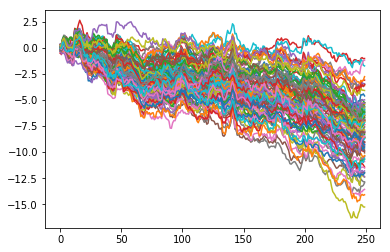

In [81]:
sample = G.generate(100).detach().numpy().T
plt.plot(sample.cumsum(axis=0))
plt.show()

In [91]:
%autoreload